<a href="https://colab.research.google.com/github/Thitiphorn267-3/BSC_DPDM23/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import pandas as pd
import os

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
shopping_data = pd.read_csv('/content/drive/MyDrive/bsc_dpdm23_data/customer_shopping_data.csv')

In [11]:
shopping_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


# ข้อมูลบางส่วนมีค่าตัวแปรบางตัวที่ไม่ทราบค่า (Missing Data)

In [13]:
shopping_data.isnull().any() # False = ข้อมูลไม่มี missing

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [12]:
shopping_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


### เราจะลบ Prince ของ records ที่เป็น Clothing, Cash, Metrocity ออก เพื่อจำลอง Missing Data

ทำให้ price missing

In [14]:
shopping_new = shopping_data[shopping_data['category']=='Clothing']
shopping_new2=shopping_new[shopping_new['payment_method']=='Cash']
shopping_new3 = shopping_new2[shopping_new2['shopping_mall']=='Metrocity']
shopping_new3

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,300.08,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,300.08,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,900.24,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,300.08,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,600.16,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,1200.32,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,900.24,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,300.08,Cash,25/02/2023,Metrocity


In [16]:
shopping_data[(shopping_data['category']=='Clothing')&(shopping_data['payment_method']=='Cash')&(shopping_data['shopping_mall']=='Metrocity')].describe()

,age,quantity,price
count,2284.000000,2284.000000,2284.000000
mean,43.657618,2.982049,894.853275
std,14.974270,1.408979,422.806539
min,18.000000,1.000000,300.080000
25%,30.750000,2.000000,600.160000
50%,44.000000,3.000000,900.240000
75%,57.000000,4.000000,1200.320000
max,69.000000,5.000000,1500.400000


In [15]:
hasmissing = shopping_data[(shopping_data['category']=='Clothing') &
              (shopping_data['payment_method']=='Cash') &
              (shopping_data['shopping_mall']=='Metrocity')]

In [19]:
hasmissing['price']= np.nan #ทำให้ค่ากลายเป็น missing

<ipython-input-19-e70a23699fed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hasmissing['price']= np.nan #ทำให้ค่ากลายเป็น missing


แยก data ส่วนที่ไม่ missing

In [20]:
hasmissing

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,NaN,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,NaN,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,NaN,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,NaN,Cash,25/02/2023,Metrocity


In [21]:
nonmissing=shopping_data[(shopping_data['category']!='Clothing') |
              (shopping_data['payment_method']!='Cash') |
              (shopping_data['shopping_mall']!='Metrocity')]

In [22]:
import numpy as np

In [23]:
willbemissing = shopping_data[(shopping_data['category']=='Clothing')&
 (shopping_data['payment_method']=='Cash')&
  (shopping_data['shopping_mall']=='Metrocity')]

In [24]:
willbemissing['price'] = np.nan

<ipython-input-24-cb08903f3628>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  willbemissing['price'] = np.nan


In [25]:
willbemissing

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,NaN,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,NaN,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,NaN,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,NaN,Cash,25/02/2023,Metrocity


In [26]:
nomissing=shopping_data[(shopping_data['category']!='Clothing') |
                     (shopping_data['payment_method']!='Cash') |
                     (shopping_data['shopping_mall']!='Metrocity')]

จับมันกลับมารวมกัน

In [27]:
new_shopping_data = pd.concat([willbemissing,nomissing])
new_shopping_data.shape

(99457, 10)

## Example

In [28]:
new_shopping_data .isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price              True
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [29]:
new_shopping_data.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price              True
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

In [30]:
new_shopping_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,97173.000000
mean,43.427089,3.003429,684.423873
std,14.990054,1.413025,949.438067
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


## Fix

### 1.innore (ลบออกไปเลย)

Quiz
*   data หายไปกี่ %
*   Mean data  รวมหลังจากแก้missing เป็นเท่าไหร่



In [32]:
len(new_shopping_data)

99457

In [33]:
dropna_data=new_shopping_data.dropna()

In [34]:
dropna_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [35]:
100*(len(new_shopping_data)-len(dropna_data))/len(new_shopping_data)

2.2964698311833254

In [36]:
dropna_data.describe()

,age,quantity,price
count,97173.000000,97173.000000,97173.000000
mean,43.421671,3.003931,684.423873
std,14.990459,1.413123,949.438067
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


### 2.เติมด้วย unknow เราจะเติมข้อมูล categorial

### 3. เติมค่าด้วย missing value

In [37]:
fillna_data = new_shopping_data.fillna(dropna_data['price'].mean())

In [38]:
fillna_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,684.423873,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,684.423873,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,684.423873,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,684.423873,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,684.423873,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.650000,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.460000,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.460000,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.000000,Cash,16/03/2021,Istinye Park


In [39]:
fillna_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,684.423873
std,14.990054,1.413025,938.472859
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


### 3.เติมด้วยค่าเฉลี่ย

Quiz

*   mean ใหม่จะมีค่าเท่าไหร่




In [ ]:
mean_val = new_shopping_data_drop['price'].mean()

In [ ]:
new_shopping_data_filmean = new_shopping_data.fillna{}

### 4.เติมด้วยค่าเฉลี่ยของกลุ่ม

Quiz
*   mean หลังเติมด้วยค่าเฉลี่ย Clothing
*   mean หลังเติมด้วยค่าเฉลี่ย cash
*   mean หลังเติมด้วยค่าเฉลี่ย Megacity
*   mean หลังเติมด้วยค่าเฉลี่ย Cash+Metrocity





In [40]:
C_M =new_shopping_data[(new_shopping_data['payment_method'] == 'Cash') &
                  (new_shopping_data['shopping_mall'] == 'Metrocity')]

In [41]:
C_M['price'].mean()

577.9630292559318

In [42]:
fillna_data3=new_shopping_data.fillna(C_M['price'].mean())

In [43]:
fillna_data3

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,577.963029,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,577.963029,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,577.963029,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,577.963029,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,577.963029,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.650000,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.460000,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.460000,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.000000,Cash,16/03/2021,Istinye Park


In [44]:
fillna_data3.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,681.979032
std,14.990054,1.413025,938.608338
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


# ข้อมูลมีความซ้ำซ้อน (Duplicate Data)

###สร้าง data Duplicate Data

In [45]:
willbedup = shopping_data[(shopping_data['category']=='Clothing') &
              (shopping_data['payment_method']=='Cash') &
              (shopping_data['shopping_mall']=='Metrocity')]

In [46]:
new_shopping_dup = pd.concat([shopping_data,willbedup])

In [47]:
new_shopping_dup.describe()

,age,quantity,price
count,101741.000000,101741.000000,101741.000000
mean,43.432264,3.002949,693.871800
std,14.989665,1.412931,933.210127
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,300.080000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [48]:
new_shopping_dup=new_shopping_dup.sort_values(by='invoice_date') #เรียงข้อมูลตามเวลา

## Example

In [49]:
new_shopping_dup[new_shopping_dup.duplicated()] #เช็กว่าข้อมูลไหนซ้ำ

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
30645,I235671,C196703,Female,45,Clothing,2,600.16,Cash,1/1/2021,Metrocity
27812,I836951,C382440,Male,54,Clothing,3,900.24,Cash,1/1/2021,Metrocity
67018,I122424,C970402,Female,30,Clothing,1,300.08,Cash,1/1/2022,Metrocity
52134,I740632,C283467,Female,49,Clothing,5,1500.40,Cash,1/1/2022,Metrocity
32519,I341543,C754279,Female,53,Clothing,5,1500.40,Cash,1/1/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
82563,I301995,C734886,Female,67,Clothing,2,600.16,Cash,9/8/2022,Metrocity
63360,I180399,C286433,Female,31,Clothing,3,900.24,Cash,9/9/2021,Metrocity
90298,I422962,C183016,Female,55,Clothing,2,600.16,Cash,9/9/2021,Metrocity
97787,I275007,C259969,Male,61,Clothing,2,600.16,Cash,9/9/2022,Metrocity


## Fix

In [50]:
new_shopping_dup.drop_duplicates().duplicated().any()

False

# ข้อมูลบางตัวในชุดข้อมูลมีลักษณะผิดปกติหรือแตกต่างจากข้อมูลส่วนใหญ่ (Outlier)

In [51]:
from matplotlib import pyplot as plt

## Example

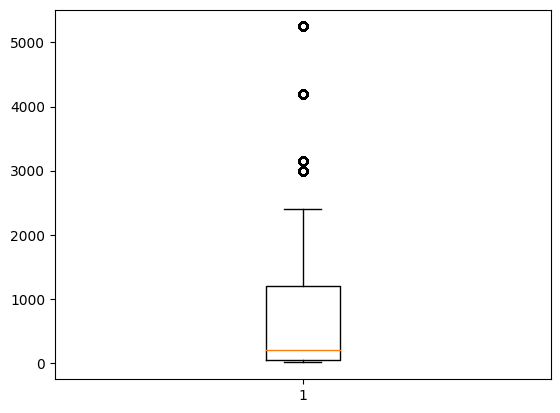

In [52]:
ret = plt.boxplot(shopping_data['price'])

## Fix

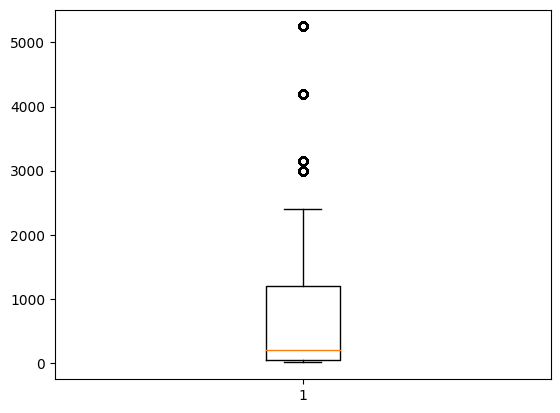

In [53]:
ret = plt.boxplot(shopping_data['price'])

In [54]:
ret

{'whiskers': [<matplotlib.lines.Line2D at 0x7a6aa423b550>,
 'caps': [<matplotlib.lines.Line2D at 0x7a6aa423ba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a6aa423b2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a6aa423bfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a6aa42702b0>],
 'means': []}

In [55]:
ret['fliers'][0].get_ydata().shape

(5024,)

In [56]:
ret['whiskers'][0].get_ydata() #หาเส้นmin เเละ IQR-min

array([45.45,  5.23])

In [57]:
ret['whiskers'][1].get_ydata() #หาเส้นmax เเละ IQR-max

array([1200.32, 2400.68])

In [58]:
ret['whiskers'][1].get_ydata()[1]

2400.68

In [59]:
no_outline=shopping_data[shopping_data['price'] <= 2400.68]

{'whiskers': [<matplotlib.lines.Line2D at 0x7a6aa40c24a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a6aa40c29e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a6aa40c2200>],
 'medians': [<matplotlib.lines.Line2D at 0x7a6aa40c2f20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a6aa40c31c0>],
 'means': []}

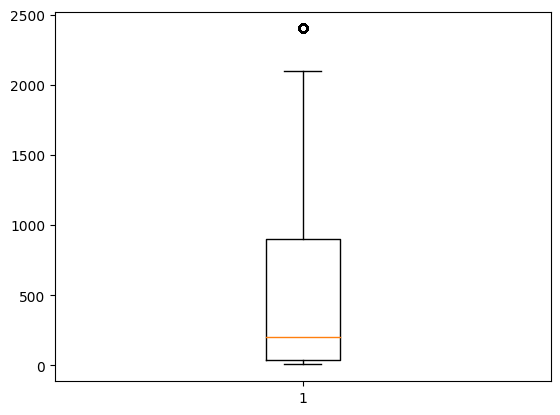

In [60]:
 plt.boxplot(no_outline['price'])

# ค่าตัวแปรบางตัวที่ไม่ถูกต้อง (Erroneous Data)

In [61]:
shopping_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
shopping_data.sort_values(by='age')

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
69089,I907811,C167489,Male,18,Shoes,3,1800.51,Debit Card,12/9/2022,Kanyon
95060,I128262,C687788,Male,18,Toys,4,143.36,Cash,2/5/2021,Mall of Istanbul
78728,I280590,C142284,Female,18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul
55784,I210628,C525437,Female,18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
2443,I115916,C338582,Male,18,Shoes,5,3000.85,Debit Card,23/08/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
66267,I433176,C202678,Male,69,Toys,5,179.20,Credit Card,27/03/2021,Istinye Park
66279,I213234,C176169,Female,69,Shoes,2,1200.34,Credit Card,7/10/2021,Viaport Outlet
85428,I117055,C208685,Female,69,Souvenir,2,23.46,Cash,15/09/2022,Metrocity
66133,I288825,C345511,Female,69,Clothing,1,300.08,Credit Card,23/07/2021,Mall of Istanbul


แก้ค่า age ของ invoice_ no = [I280590,I210628	]เป็น less than 18

In [63]:
shopping_data.loc[55784,'age']='less than'

In [62]:
shopping_data[(shopping_data['invoice_no'] == 'I280590')  | (shopping_data['invoice_no'] =='I210628')] ['age'] = 'less than18'

<ipython-input-62-fdac254f1302>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopping_data[(shopping_data['invoice_no'] == 'I280590')  | (shopping_data['invoice_no'] =='I210628')] ['age'] = 'less than18'


In [64]:
shopping_data.loc[(55784,78728),'age'] = 'less than 18'

In [65]:
shopping_data[(shopping_data['invoice_no']=='I280590') | (shopping_data['invoice_no']=='I210628')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,less than 18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,less than 18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


In [66]:
shopping_data.describe()

,quantity,price
count,99457.000000,99457.000000
mean,3.003429,689.256321
std,1.413025,941.184567
min,1.000000,5.230000
25%,2.000000,45.450000
50%,3.000000,203.300000
75%,4.000000,1200.320000
max,5.000000,5250.000000


## Example

### ทดลองประมวลผลคอลัมป์ Age

In [67]:
shopping_data(['age']).mean()

TypeError: 'DataFrame' object is not callable

##สมมุติว่า error บอกว่าไม่สามารถประมวลผลค่า 'less than 18' ได้

หาค่า Error ว่าอยู๋ที่ไหน เพื่อที่จะได้รู้ว่าเราต้องแก้ตรงคอลัมป์ไหน

In [68]:
shopping_data[shopping_data.eq('less than 18').any(1)]

<ipython-input-68-4744250e9fad>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  shopping_data[shopping_data.eq('less than 18').any(1)]


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,less than 18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,less than 18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


## Fix

แทนค่าด้วยค่าที่เหมาะสม

In [69]:
shopping_data['age']=shopping_data['age'].replace('less than 18',17)

In [70]:
shopping_data[shopping_data.eq('less than 18').any(1)]

<ipython-input-70-4744250e9fad>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  shopping_data[shopping_data.eq('less than 18').any(1)]


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [71]:
shopping_data[(shopping_data['invoice_no']=='I280590') | (shopping_data['invoice_no']=='I210628')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,17,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,17,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


# ข้อมูลมีค่าตัวแปรไม่สอดคล้องซึ่งกันและกัน (Inconsistent)

## Example

เกิดเมื่อรวมข้อมูลจากหลายแหล่งแล้วค่าใน 2 คอลัมป์ ไม่เป็นในทา
เดียวกัน เช่น คอลัมป์อายุไม่ตรงกับ คอลัมป์วันเกิดหลังจากคำนวณอายุแล้ว

## Fix

เลือกเก็บไว้เฉพาะ คอลัมป์ที่ถูก

# Data Intergration (การรวมข้อมูลจากหลายแหล่ง)

## 1.รวมเเกน y (เพิ่ม row - เพิ่ม Data)
ex. olddata and newdata

In [73]:
Sep_df = pd.read_excel('/content/drive/MyDrive/dataviz2023/Copy of ผลการใช้จ่ายงบประมาณรายจ่ายของจังหวัดเชียงใหม่ ประจำปีงบประมาณ พ.ศ. 2565 เดือนกันยายน 2565.xlsx', header=8,skipfooter=26)
Octo_df = pd.read_excel('/content/drive/MyDrive/dataviz2023/Copy of ผลการใช้จ่ายงบประมาณรายจ่ายของจังหวัดเชียงใหม่ ประจำปีงบประมาณ พ.ศ. 2565 เดือนตุลาคม 2565.xlsx', header=9,skipfooter=27)
#header=x ให้หัวตาราง เป็น row ที่ x ของ excel
#skipfooter=x ตัดrowเป็นจำนวนที่ x ตาม index เริ่มจากล่างขึ้นบน

In [74]:
sep_df=Sep_df.iloc[-2:,:15]
sep_df['เดือน-ปี'] = len(sep_df)*['sep-65']
sep_df

,รายการ,งบประมาณ,สำรองเงินมีหนี้,PO,เบิกจ่าย,ร้อยละ\nเบิกจ่าย,เป้า\nหมาย Q4,*/- เป้าหมาย,การใช้จ่าย (PO+เบิกจ่าย),ร้อยละ\nการใช้จ่าย,เป้า\nหมาย Q4.1,*/- เป้าหมาย.1,คงเหลือ\nหลังหักใช้จ่าย,ลำดับเบิกจ่าย,ลำดับ\nใช้จ่าย,เดือน-ปี
2,ประจำ,1.892013e+10,7.925745e+07,7.131600e+07,1.880196e+10,99.375405,98.0,1.375405,1.895253e+10,100.171242,100.0,0.171242,-3.239918e+07,NaN,NaN,sep-65
3,ลงทุน,9.605258e+09,2.683430e+08,1.119320e+09,8.201965e+09,85.390363,75.0,10.390363,9.589628e+09,99.837275,100.0,-0.162725,1.563013e+07,6.0,15.0,sep-65


In [75]:
oct_df= Octo_df.iloc[-2:,:15]
oct_df['เดือน-ปี'] = len(oct_df)*['Octo-65']
oct_df

,รายการ,งบประมาณ,สำรองเงินมีหนี้,PO,เบิกจ่าย,ร้อยละ\nเบิกจ่าย,เป้า\nหมาย Q1,*/- เป้าหมาย,การใช้จ่าย (PO+เบิกจ่าย),ร้อยละ\nการใช้จ่าย,เป้า\nหมาย Q1.1,*/- เป้าหมาย.1,คงเหลือ\nหลังหักใช้จ่าย,ลำดับเบิกจ่าย,ลำดับ\nใช้จ่าย,เดือน-ปี
2,ประจำ,6822.811789,NaN,12.706842,3984.779058,58.403766,35.0,23.403766,3997.485900,58.590007,35.33,23.260007,2825.325889,NaN,NaN,Octo-65
3,ลงทุน,6180.211723,NaN,457.295806,1291.209026,20.892634,19.0,1.892634,1748.504832,28.291989,28.96,-0.668011,4431.706890,4.0,6.0,Octo-65


In [76]:
sep_oct_df = pd.concat([sep_df,oct_df])

In [77]:
sep_oct_df

,รายการ,งบประมาณ,สำรองเงินมีหนี้,PO,เบิกจ่าย,ร้อยละ\nเบิกจ่าย,เป้า\nหมาย Q4,*/- เป้าหมาย,การใช้จ่าย (PO+เบิกจ่าย),ร้อยละ\nการใช้จ่าย,เป้า\nหมาย Q4.1,*/- เป้าหมาย.1,คงเหลือ\nหลังหักใช้จ่าย,ลำดับเบิกจ่าย,ลำดับ\nใช้จ่าย,เดือน-ปี,เป้า\nหมาย Q1,เป้า\nหมาย Q1.1
2,ประจำ,1.892013e+10,7.925745e+07,7.131600e+07,1.880196e+10,99.375405,98.0,1.375405,1.895253e+10,100.171242,100.0,0.171242,-3.239918e+07,NaN,NaN,sep-65,NaN,NaN
3,ลงทุน,9.605258e+09,2.683430e+08,1.119320e+09,8.201965e+09,85.390363,75.0,10.390363,9.589628e+09,99.837275,100.0,-0.162725,1.563013e+07,6.0,15.0,sep-65,NaN,NaN
2,ประจำ,6.822812e+03,NaN,1.270684e+01,3.984779e+03,58.403766,NaN,23.403766,3.997486e+03,58.590007,NaN,23.260007,2.825326e+03,NaN,NaN,Octo-65,35.0,35.33
3,ลงทุน,6.180212e+03,NaN,4.572958e+02,1.291209e+03,20.892634,NaN,1.892634,1.748505e+03,28.291989,NaN,-0.668011,4.431707e+03,4.0,6.0,Octo-65,19.0,28.96


## 2. รวมแกน Y (เพิ่ม column - feature )

In [78]:
project_df = pd.read_csv('/content/drive/MyDrive/Dataviz_23data/opendata_project-2.csv')
project_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Dataviz_23data/opendata_project-2.csv'

# Data Reduction

# Reduce number of data (Y-aix) - Sampling

# Reduce dimension of data (X-axis) - PCA & Stats